In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
smoothing_param = 5

In [4]:
output_dir = f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/large_scale_peaks_all/peaks_smoothed_{smoothing_param}_new/'
file_path = f'{output_dir}peaks_dict.csv'
columns = ['event', 'scardec_opt_peaks',  'scardec_moy_peaks', 'ye_peaks', 'usgs_peaks', 'sigloch_0_peaks', 'sigloch_1_peaks', 'isc_peaks']
df = pd.read_csv(file_path, header=None, names=columns)#, header=None)
#df['int_magnitude'] = df['magnitude'].astype(int)

In [5]:
df

,event,scardec_opt_peaks,scardec_moy_peaks,ye_peaks,usgs_peaks,sigloch_0_peaks,sigloch_1_peaks,isc_peaks
20170818_0259,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN
20110126_1542,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
19981010_1629,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
19920730_0824,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN
19960327_2052,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
20240122_1809,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
20240402_2358,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
20240628_0536,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
20240817_1910,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [6]:
combined = pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/stf/data/combined_scardec_ye_usgs_sigloch_isc_mag.csv')


In [7]:
df.drop(columns=['event'], inplace=True)

In [8]:
df.index.name = 'event'
df.reset_index(inplace=True)
#df.drop(columns=['event'], inplace=True)

In [9]:
df

,event,scardec_opt_peaks,scardec_moy_peaks,ye_peaks,usgs_peaks,sigloch_0_peaks,sigloch_1_peaks,isc_peaks
0,20170818_0259,3.0,2.0,NaN,NaN,NaN,NaN,NaN
1,20110126_1542,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2,19981010_1629,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,19920730_0824,2.0,1.0,NaN,NaN,NaN,NaN,NaN
4,19960327_2052,5.0,2.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4404,20240122_1809,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4405,20240402_2358,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4406,20240628_0536,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4407,20240817_1910,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [10]:
# Convert 'event' column to string type in both dataframes
df['event'] = df['event'].astype(str)
combined['event'] = combined['event'].astype(str)

# Merge the dataframes on the 'event' column
df_2 = df.merge(combined[['event', 'mag']], on='event', how='left')

# Rename the 'mag' column to 'magnitude' in the merged dataframe
df_2.rename(columns={'mag': 'magnitude'}, inplace=True)

df_2

,event,scardec_opt_peaks,scardec_moy_peaks,ye_peaks,usgs_peaks,sigloch_0_peaks,sigloch_1_peaks,isc_peaks,magnitude
0,20170818_0259,3.0,2.0,NaN,NaN,NaN,NaN,NaN,6.591
1,20110126_1542,1.0,1.0,NaN,NaN,NaN,NaN,NaN,6.114
2,19981010_1629,1.0,1.0,NaN,NaN,NaN,NaN,NaN,5.927
3,19920730_0824,2.0,1.0,NaN,NaN,NaN,NaN,NaN,6.017
4,19960327_2052,5.0,2.0,NaN,NaN,NaN,NaN,NaN,6.157
...,...,...,...,...,...,...,...,...,...
4404,20240122_1809,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4405,20240402_2358,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
4406,20240628_0536,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4407,20240817_1910,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [53]:
for column in df_2.columns:
	max_value = df_2[column].max()
	print(f"The maximum value in column {column} is {max_value}")
	max_row = df_2[df_2[column] == max_value]
	print(f"The row with the maximum value in column {column} is:\n{max_row}")

The maximum value in column event is 20250107_0105
The row with the maximum value in column event is:
              event  scardec_opt_peaks  scardec_moy_peaks  ye_peaks  \
4408  20250107_0105                NaN                NaN       NaN   

      usgs_peaks  sigloch_0_peaks  sigloch_1_peaks  isc_peaks  magnitude  
4408         1.0              NaN              NaN        NaN        NaN  
The maximum value in column scardec_opt_peaks is 9.0
The row with the maximum value in column scardec_opt_peaks is:
              event  scardec_opt_peaks  scardec_moy_peaks  ye_peaks  \
1379  20130715_1403                9.0                4.0       NaN   

      usgs_peaks  sigloch_0_peaks  sigloch_1_peaks  isc_peaks  magnitude  
1379         NaN              NaN              NaN        NaN      7.388  
The maximum value in column scardec_moy_peaks is 7.0
The row with the maximum value in column scardec_moy_peaks is:
              event  scardec_opt_peaks  scardec_moy_peaks  ye_peaks  \
1354  199

In [10]:
df_combined = df_2.copy()

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import cmcrameri.cm as cmc

In [12]:
colors = cmc.batlow(np.linspace(0, 1, 5))
unique_datasets = ['scardec', 'usgs', 'sigloch', 'ye', 'isc']
dataset_colors = {dataset: colors[i] for i, dataset in enumerate(unique_datasets)}

(0.0, 10.0)

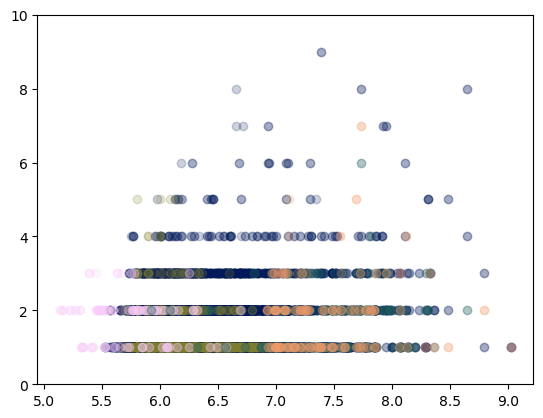

In [15]:
plt.scatter(df_2['magnitude'], df_2['scardec_opt_peaks'],  alpha = 0.2, color = dataset_colors['scardec'])
plt.scatter(df_2['magnitude'], df_2['scardec_moy_peaks'],  alpha = 0.2, color = dataset_colors['scardec'])
plt.scatter(df_2['magnitude'], df_2['sigloch_0_peaks'],  alpha = 0.2, color = dataset_colors['sigloch'])
plt.scatter(df_2['magnitude'], df_2['isc_peaks'],  alpha = 0.2, color = dataset_colors['isc'])
plt.scatter(df_2['magnitude'], df_2['usgs_peaks'],  alpha = 0.2, color = dataset_colors['usgs'])
plt.scatter(df_2['magnitude'], df_2['ye_peaks'],  alpha = 0.2, color = dataset_colors['ye'])
plt.ylim(0, 10)

In [165]:
df_all = df.copy()

In [57]:
len(df_2.event.unique())

4409

In [60]:
total_peaks = []
for column in df_2.columns:
	if 'peaks' in column:
		total_peaks.append(df_2[column].values)

In [61]:
total_peaks = np.concatenate(total_peaks)

In [62]:
total_peaks = total_peaks[~np.isnan(total_peaks)]

In [63]:
len(total_peaks[total_peaks == 1])

6042

In [64]:
len(total_peaks)

8959

(array([0.000e+00, 6.042e+03, 2.403e+03, 4.250e+02, 5.600e+01, 1.600e+01,
        9.000e+00, 5.000e+00, 3.000e+00]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <BarContainer object of 9 artists>)

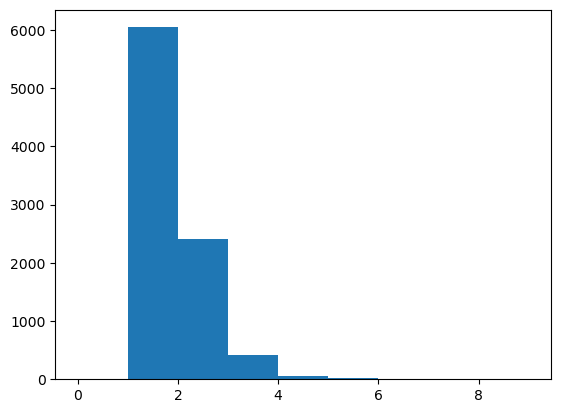

In [65]:
plt.hist(total_peaks, bins = np.arange(0, 10, 1))


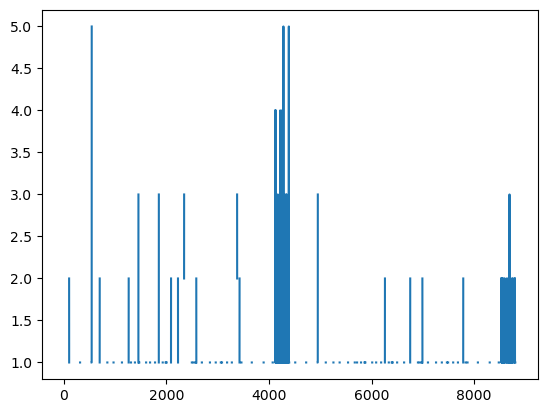

In [16]:
plt.plot(df_combined['sigloch_0_peaks'])

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


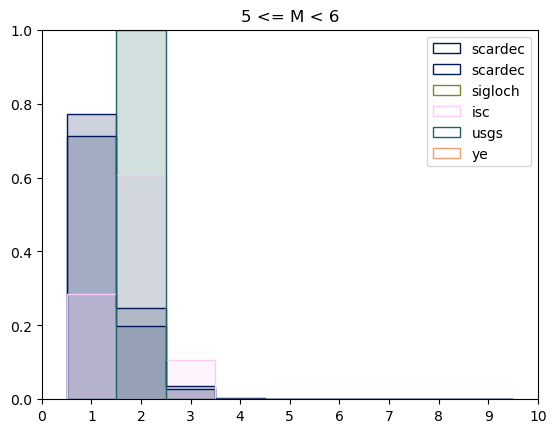

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


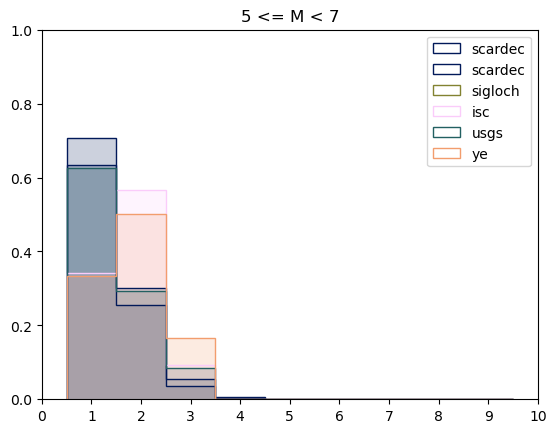

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


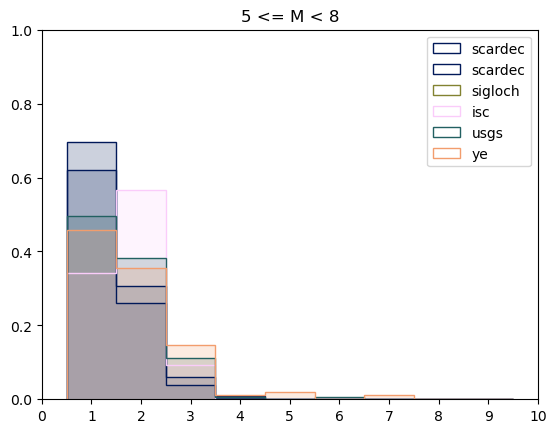

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


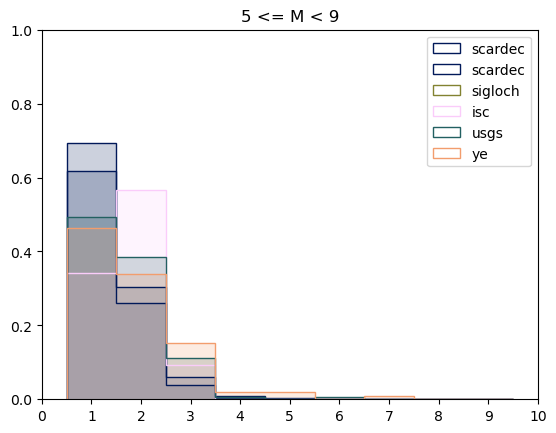

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


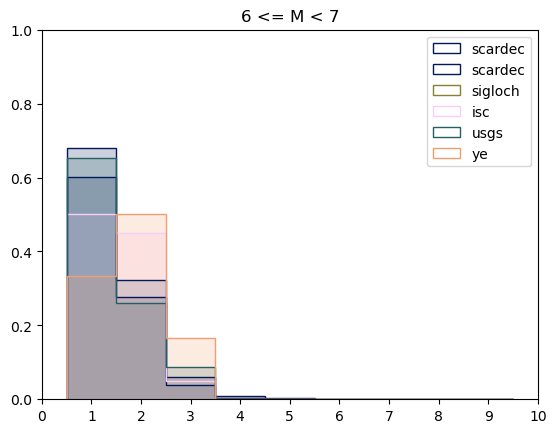

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


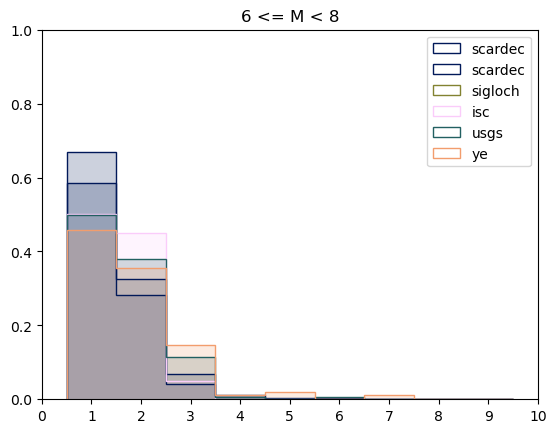

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


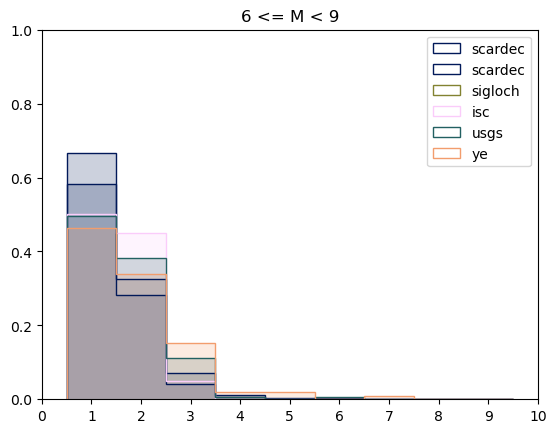

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


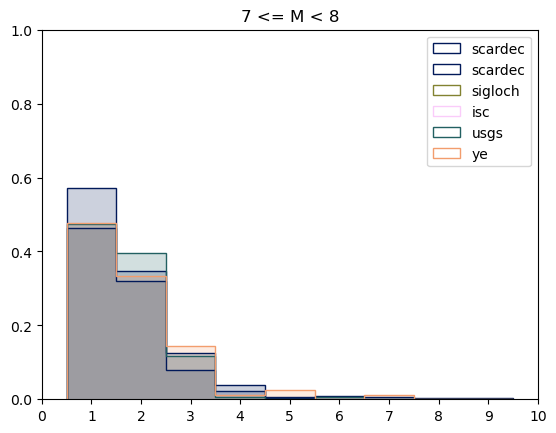

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


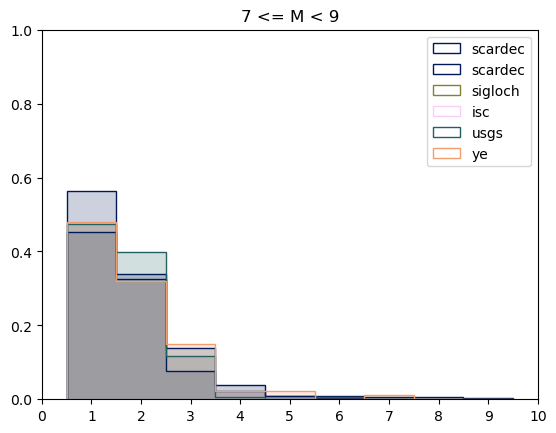

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


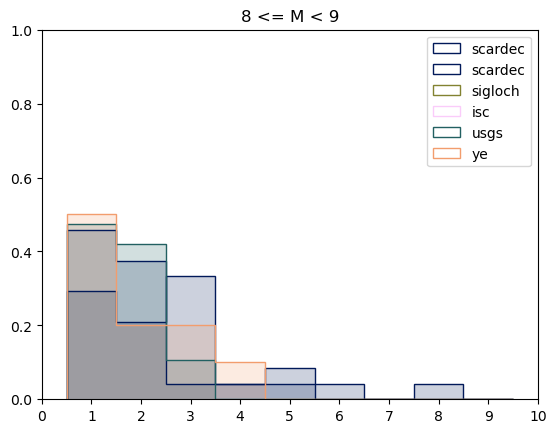

In [100]:
df = df_combined
df_mean = pd.DataFrame()
df_median = pd.DataFrame()
df_numbers = pd.DataFrame()
for LL in [5,6,7,8]:
	for UL in [6,7,8,9]:
		if UL <= LL:
			continue
		df = df_combined[(df_combined['magnitude'] < UL) & (df_combined['magnitude'] >= LL)]
		# df = df[(df['scardec_opt_r2'] >= 0.95) | df['scardec_opt_r2'].isna()]
		# df = df[(df['scardec_moy_r2'] >= 0.95) | df['scardec_moy_r2'].isna()]
		# df = df[(df['ye_r2'] >= 0.95) | df['ye_r2'].isna()]
		# df = df[(df['usgs_r2'] >= 0.95) | df['usgs_r2'].isna()]
		# df = df[(df['isc_r2'] >= 0.95) | df['isc_r2'].isna()]
		# df = df[(df['sigloch_0_r2'] >= 0.95) | df['sigloch_0_r2'].isna()]

		bins = np.arange(0.5, 10.5, 1)
		plt.hist(df['scardec_opt_peaks'], bins = bins, alpha = 1, density = True, histtype = 'step', color = dataset_colors['scardec'], label = 'scardec')
		plt.hist(df['scardec_moy_peaks'], bins = bins, alpha = 1, density = True, histtype = 'step', color = dataset_colors['scardec'], label = 'scardec')
		plt.hist(df['sigloch_peaks'], bins = bins, alpha = 1, density = True, histtype = 'step', color = dataset_colors['sigloch'], label = 'sigloch')
		plt.hist(df['isc_peaks'], bins = bins, alpha = 1, density = True, histtype = 'step', color = dataset_colors['isc'], label = 'isc')
		plt.hist(df['usgs_peaks'], bins = bins, alpha = 1, density = True, histtype = 'step', color = dataset_colors['usgs'], label = 'usgs')
		plt.hist(df['ye_peaks'], bins = bins, alpha = 1, density = True, histtype = 'step', color = dataset_colors['ye'], label = 'ye')


		plt.hist(df['scardec_opt_peaks'], bins = bins, alpha = .2, density = True, histtype = 'bar', color = dataset_colors['scardec'])
		plt.hist(df['scardec_moy_peaks'], bins = bins, alpha = .2, density = True, histtype = 'bar', color = dataset_colors['scardec'])
		plt.hist(df['sigloch_peaks'], bins = bins, alpha = .2, density = True, histtype = 'bar', color = dataset_colors['sigloch'])
		plt.hist(df['isc_peaks'], bins = bins, alpha = .2, density = True, histtype = 'bar', color = dataset_colors['isc'])
		plt.hist(df['usgs_peaks'], bins = bins, alpha = .2, density = True, histtype = 'bar', color = dataset_colors['usgs'])
		plt.hist(df['ye_peaks'], bins = bins, alpha = .2, density = True, histtype = 'bar', color = dataset_colors['ye'])

		plt.xticks(np.arange(0, 11, 1))
		plt.ylim(0, 1)
		plt.title(f'{LL} <= M < {UL}')
		plt.legend()

		df_mean[f'{LL}_{UL}'] = [np.mean(df['scardec_opt_peaks']), np.mean(df['scardec_moy_peaks']), np.mean(df['sigloch_peaks']), np.mean(df['isc_peaks']), np.mean(df['usgs_peaks']), np.mean(df['ye_peaks'])]
		df_median[f'{LL}_{UL}'] = [np.nanmedian(df['scardec_opt_peaks']), np.nanmedian(df['scardec_moy_peaks']), np.nanmedian(df['sigloch_peaks']), np.nanmedian(df['isc_peaks']), np.nanmedian(df['usgs_peaks']), np.nanmedian(df['ye_peaks'])]		
		df_numbers[f'{LL}_{UL}'] = [len(df[df['scardec_opt_peaks'].notna()]), len(df[df['scardec_moy_peaks'].notna()]), len(df[df['sigloch_peaks'].notna()]), len(df[df['isc_peaks'].notna()]), len(df[df['usgs_peaks'].notna()]), len(df[df['ye_peaks'].notna()])]
		plt.show()


In [101]:
df_numbers.index = ['scardec_opt', 'scardec_moy', 'sigloch', 'isc', 'usgs', 'ye']
df_numbers
print(df_numbers.to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrrrrrr}
\toprule
 & 5_6 & 5_7 & 5_8 & 5_9 & 6_7 & 6_8 & 6_9 & 7_8 & 7_9 & 8_9 \\
\midrule
scardec_opt & 1028 & 3528 & 3848 & 3872 & 2500 & 2820 & 2844 & 320 & 344 & 24 \\
scardec_moy & 1049 & 3653 & 3980 & 4004 & 2604 & 2931 & 2955 & 327 & 351 & 24 \\
sigloch & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
isc & 56 & 76 & 76 & 76 & 20 & 20 & 20 & 0 & 0 & 0 \\
usgs & 1 & 24 & 186 & 205 & 23 & 185 & 204 & 162 & 181 & 19 \\
ye & 0 & 12 & 96 & 106 & 12 & 96 & 106 & 84 & 94 & 10 \\
\bottomrule
\end{tabular}



In [102]:
df_mean.index = ['scardec_opt', 'scardec_moy', 'sigloch', 'isc', 'usgs', 'ye']
print(df_mean.round(2))

              5_6   5_7   5_8   5_9   6_7   6_8   6_9   7_8   7_9   8_9
scardec_opt  1.33  1.45  1.49  1.50  1.50  1.55  1.55  1.94  1.99  2.62
scardec_moy  1.26  1.34  1.36  1.36  1.37  1.40  1.40  1.57  1.60  1.96
sigloch       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
isc          1.82  1.75  1.75  1.75  1.55  1.55  1.55   NaN   NaN   NaN
usgs         2.00  1.46  1.65  1.65  1.43  1.65  1.65  1.68  1.67  1.63
ye            NaN  1.83  1.82  1.83  1.83  1.82  1.83  1.82  1.83  1.90


In [103]:
print(df_mean.to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrrrrrr}
\toprule
 & 5_6 & 5_7 & 5_8 & 5_9 & 6_7 & 6_8 & 6_9 & 7_8 & 7_9 & 8_9 \\
\midrule
scardec_opt & 1.33 & 1.45 & 1.49 & 1.50 & 1.50 & 1.55 & 1.55 & 1.94 & 1.99 & 2.62 \\
scardec_moy & 1.26 & 1.34 & 1.36 & 1.36 & 1.37 & 1.40 & 1.40 & 1.57 & 1.60 & 1.96 \\
sigloch & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN & NaN \\
isc & 1.82 & 1.75 & 1.75 & 1.75 & 1.55 & 1.55 & 1.55 & NaN & NaN & NaN \\
usgs & 2.00 & 1.46 & 1.65 & 1.65 & 1.43 & 1.65 & 1.65 & 1.68 & 1.67 & 1.63 \\
ye & NaN & 1.83 & 1.82 & 1.83 & 1.83 & 1.82 & 1.83 & 1.82 & 1.83 & 1.90 \\
\bottomrule
\end{tabular}



In [104]:
df_median.index = ['scardec_opt', 'scardec_moy', 'sigloch', 'isc', 'usgs', 'ye']
df_median

,5_6,5_7,5_8,5_9,6_7,6_8,6_9,7_8,7_9,8_9
scardec_opt,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.5
scardec_moy,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
sigloch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isc,2.0,2.0,2.0,2.0,1.5,1.5,1.5,NaN,NaN,NaN
usgs,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
ye,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.5


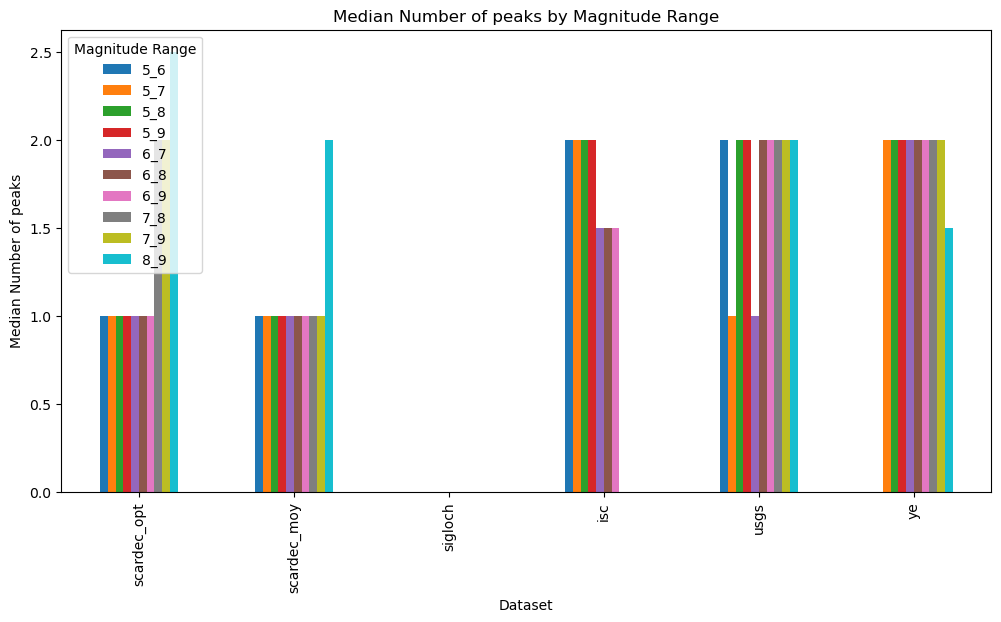

In [96]:
df_median.plot(kind='bar', figsize=(12, 6))
plt.title('Median Number of peaks by Magnitude Range')
plt.xlabel('Dataset')
plt.ylabel('Median Number of peaks')
plt.legend(title='Magnitude Range')
plt.show()

In [ ]:
i

5

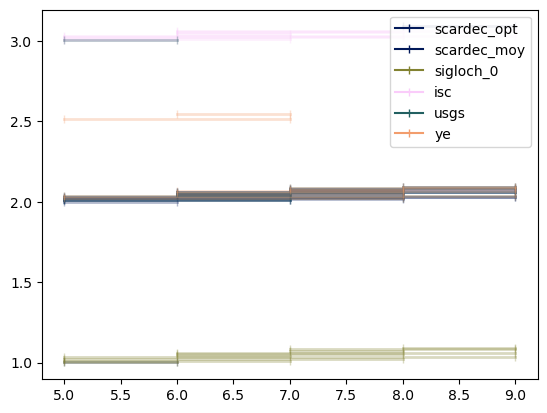

In [ ]:
count = 0

marker_list = ['o', 's', 'D', 'v', '^', '<', '>', 'p', 'P', 'X', '.']
for i, row in df_median.iterrows():
	marker_index = 0
	bin_count = 0
	plt.plot([],[], label = i, color = dataset_colors[i.split('_')[0]], marker='|')
	for column in df_median.columns:
		plt.plot([int(column.split('_')[0]), int(column.split('_')[1])], 
		   		 [row[column]+count+bin_count, row[column]+count+bin_count], 
				 color = dataset_colors[i.split('_')[0]], marker="|", alpha = 0.3, linewidth = 2)#marker_list[marker_index])
		marker_index += 1
		bin_count += 0.01
		
		
	count += 0.001#0.1
	
	
# marker_index = 0
# for column in df_median.columns:
# 	plt.plot([],[], label = column, color = 'black', marker=marker_list[marker_index])
# 	marker_index += 1
plt.legend()

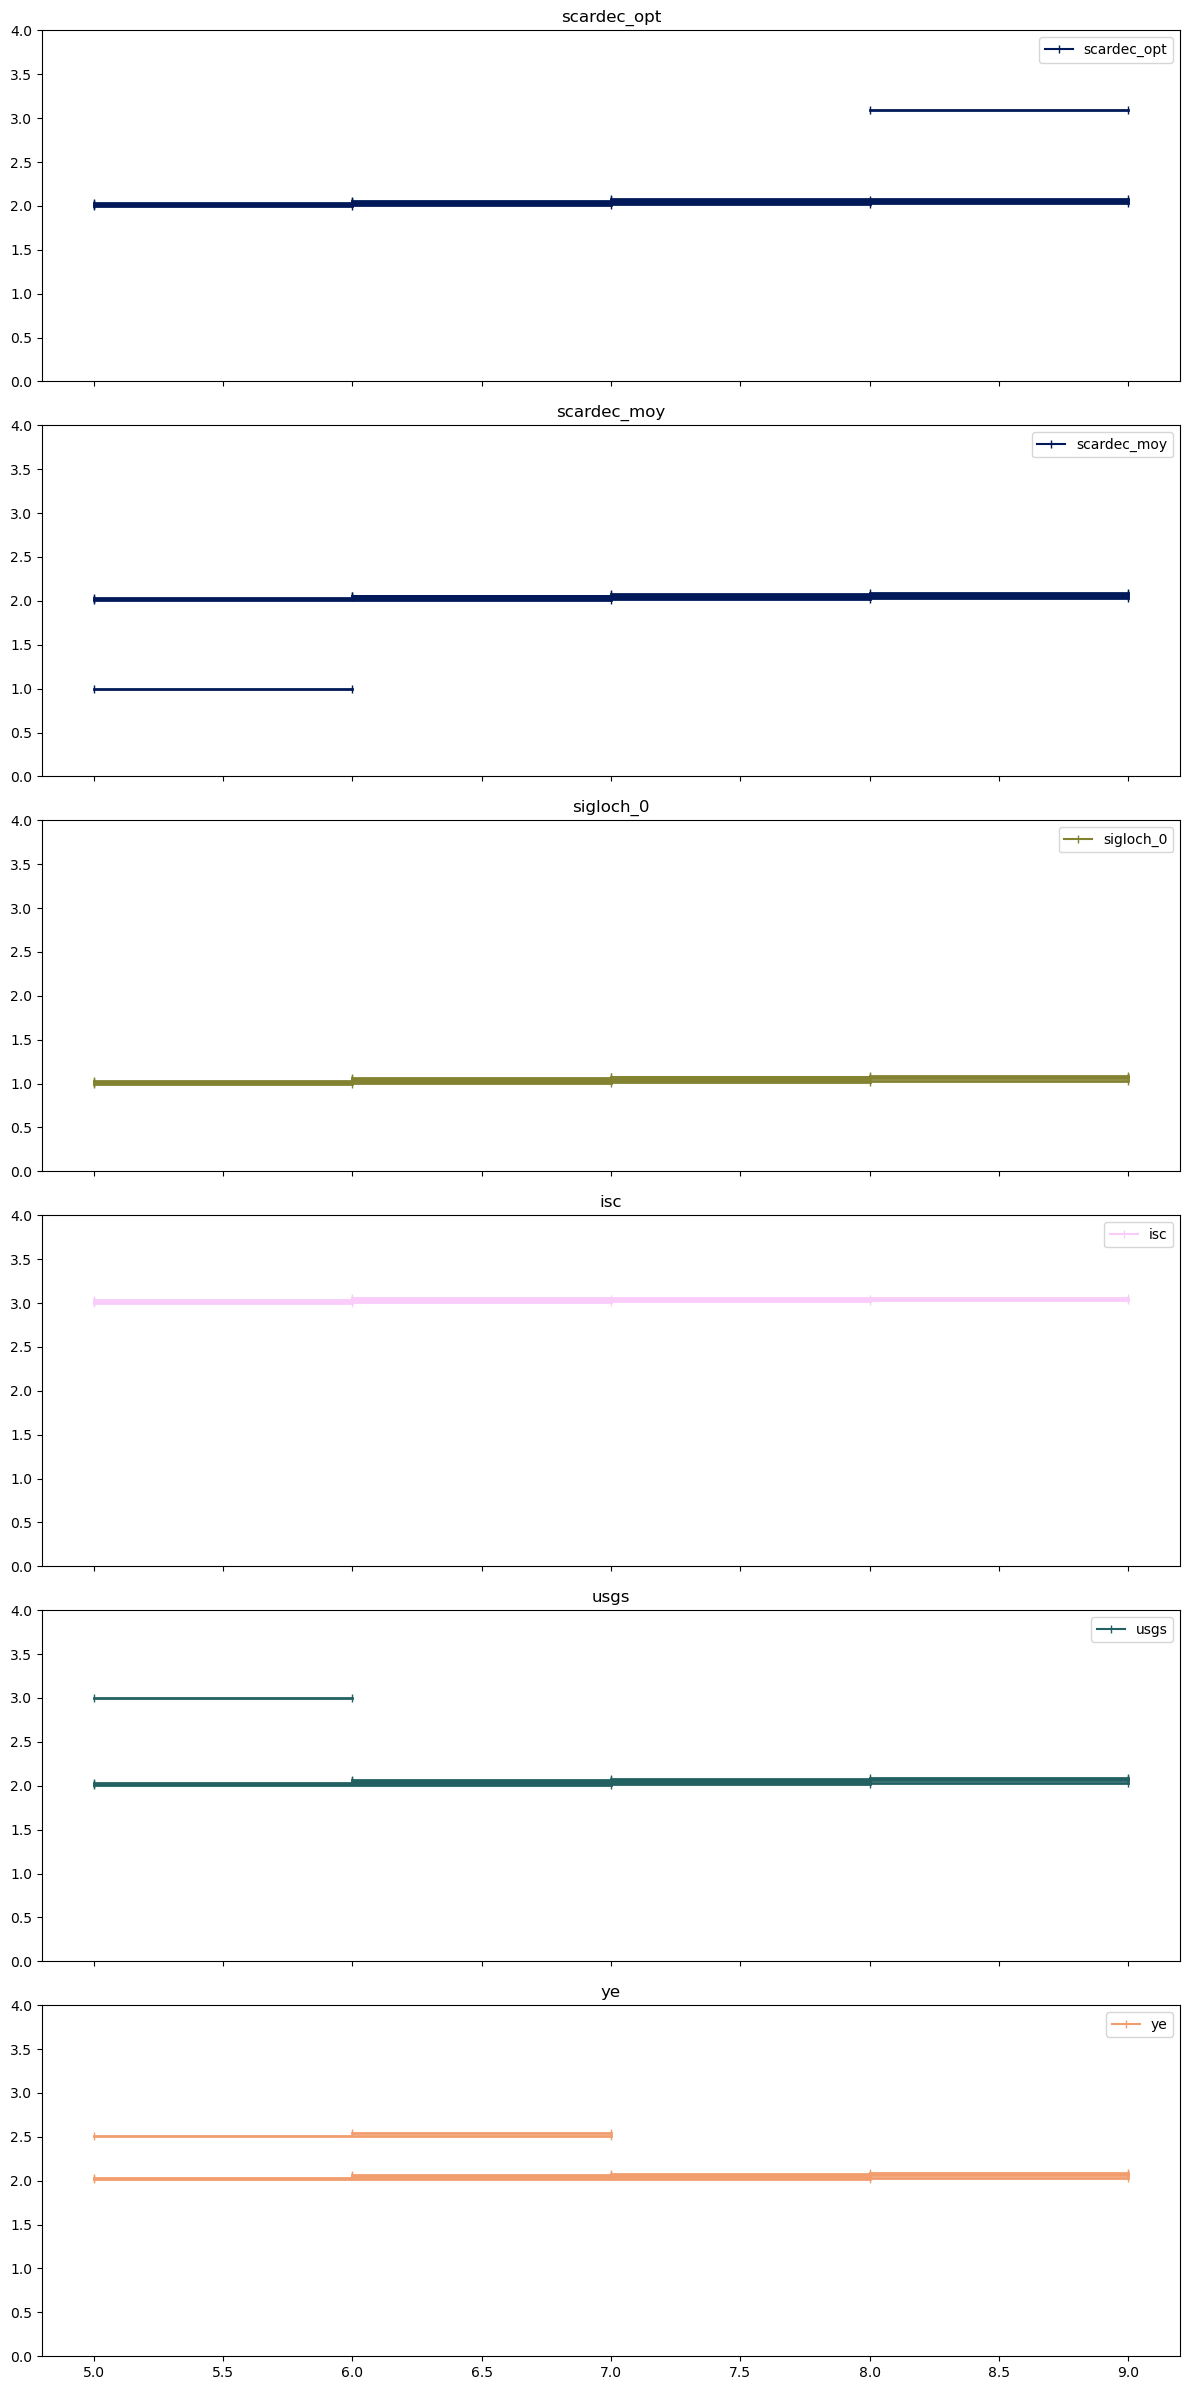

In [ ]:
count = 0
marker_list = ['o', 's', 'D', 'v', '^', '<', '>', 'p', 'P', 'X', '.']

fig, axs = plt.subplots(len(df_median), 1, figsize=(12, len(df_median) * 4), sharex=True)

for ax, (i, row) in zip(axs, df_median.iterrows()):
	marker_index = 0
	bin_count = 0
	ax.plot([], [], label=i, color=dataset_colors[i.split('_')[0]], marker='|')
	for column in df_median.columns:
		ax.plot([int(column.split('_')[0]), int(column.split('_')[1])], 
				[row[column] + count + bin_count, row[column] + count + bin_count], 
				color=dataset_colors[i.split('_')[0]], marker="|", alpha=1, linewidth=2)
		marker_index += 1
		bin_count += 0.01
	ax.legend()
	ax.set_title(i)
	ax.set_ylim(0, 4)

plt.tight_layout()
plt.show()

In [ ]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [ ]:
lighten_color('g', 1.3)

(0.0, 0.04999999999999982, 0.0)

In [ ]:
column

NameError: name 'column' is not defined

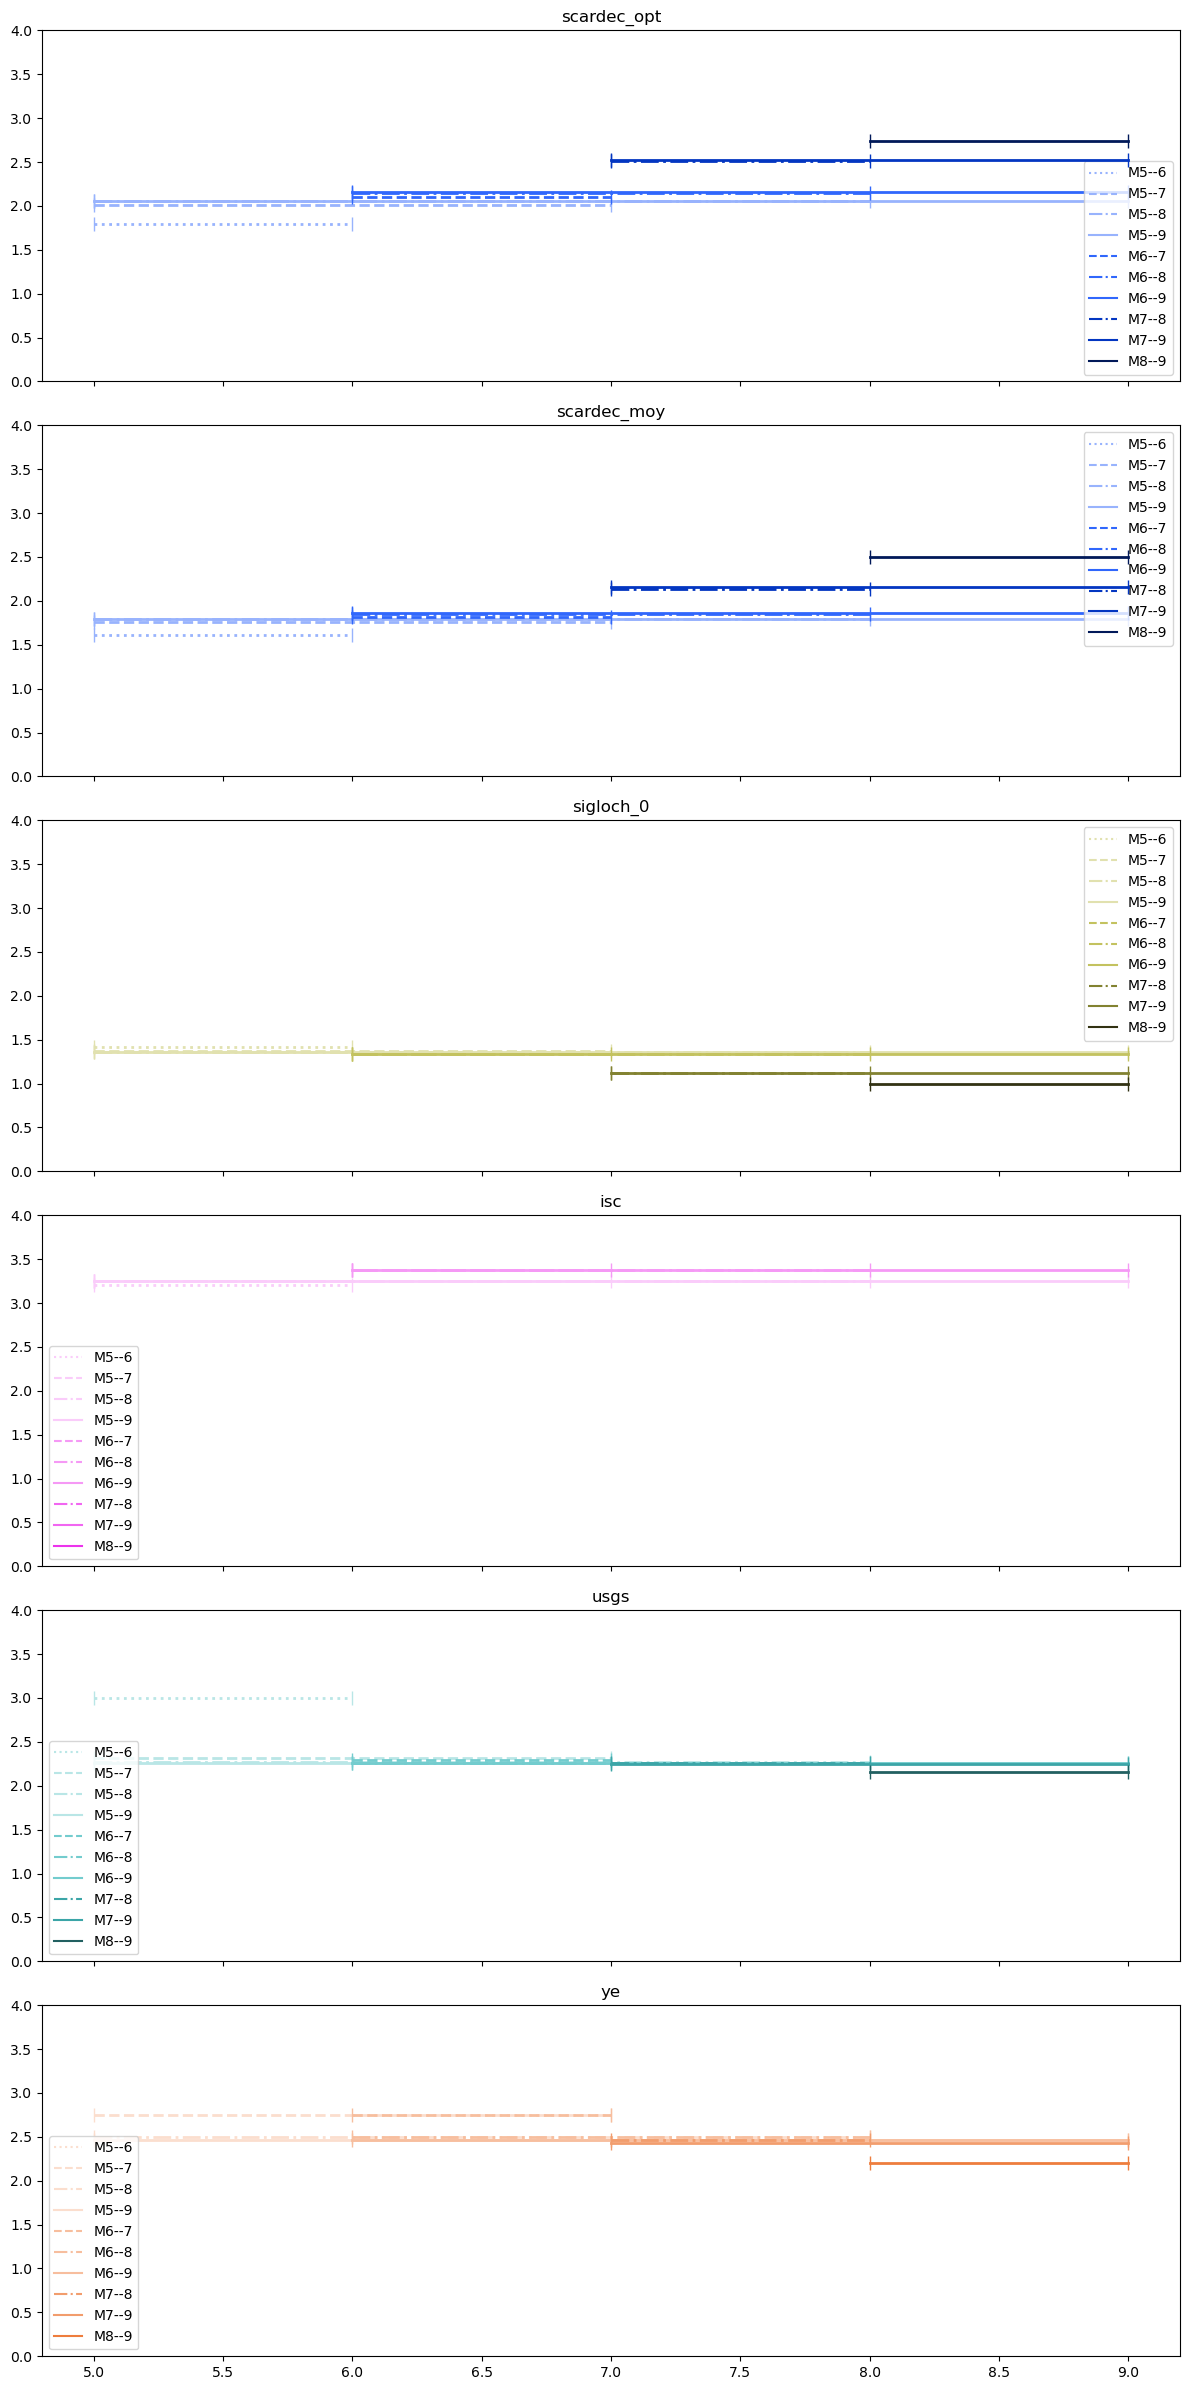

In [ ]:
count = 0
marker_list = ['o', 's', 'D', 'v', '^', '<', '>', 'p', 'P', 'X', '.']
line_styles = {'5': ':', '6': ':', '7': '--', '8': '-.', '9': '-'}
fig, axs = plt.subplots(len(df_mean), 1, figsize=(12, len(df_mean) * 4), sharex=True)

for ax, (i, row) in zip(axs, df_mean.iterrows()):
	marker_index = 0
	bin_count = 0
	#ax.plot([], [], label=i, color=dataset_colors[i.split('_')[0]], marker='|')
	for column in df_mean.columns:
		lighten = (int(column.split('_')[0])-4)/5
		if row.name.startswith('scardec') or row.name.startswith('usgs'):
			lighten = (int(column.split('_')[0])-4)/4
		elif row.name.startswith('sigloch') or row.name.startswith('ye'):
			lighten = (int(column.split('_')[0])-4)/3
		elif row.name.startswith('isc'):
			lighten = (int(column.split('_')[0])-4)
		else:
			lighten = (int(column.split('_')[0])-4)/4
		ax.plot([int(column.split('_')[0]), int(column.split('_')[1])], 
				[row[column], row[column]], 
				color=lighten_color(dataset_colors[i.split('_')[0]], lighten),
				marker="|", alpha=1, linewidth=2, markersize=10, linestyle=line_styles[column.split('_')[1]],
				zorder = int(lighten*10))
		ax.plot([],[], label = f"M{column.split('_')[0]}--{column.split('_')[1]}", color = lighten_color(dataset_colors[i.split('_')[0]], lighten), linestyle=line_styles[column.split('_')[1]])
		marker_index += 1
		bin_count += 0.01
	ax.legend()
	ax.set_title(i)
	ax.set_ylim(0, 4)

plt.tight_layout()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/large_scale_peaks_all/results_95_threshold/mean_gaussians_by_magnitude_range_only_no_zoom.png')

plt.show()

In [ ]:
column

'8_9'

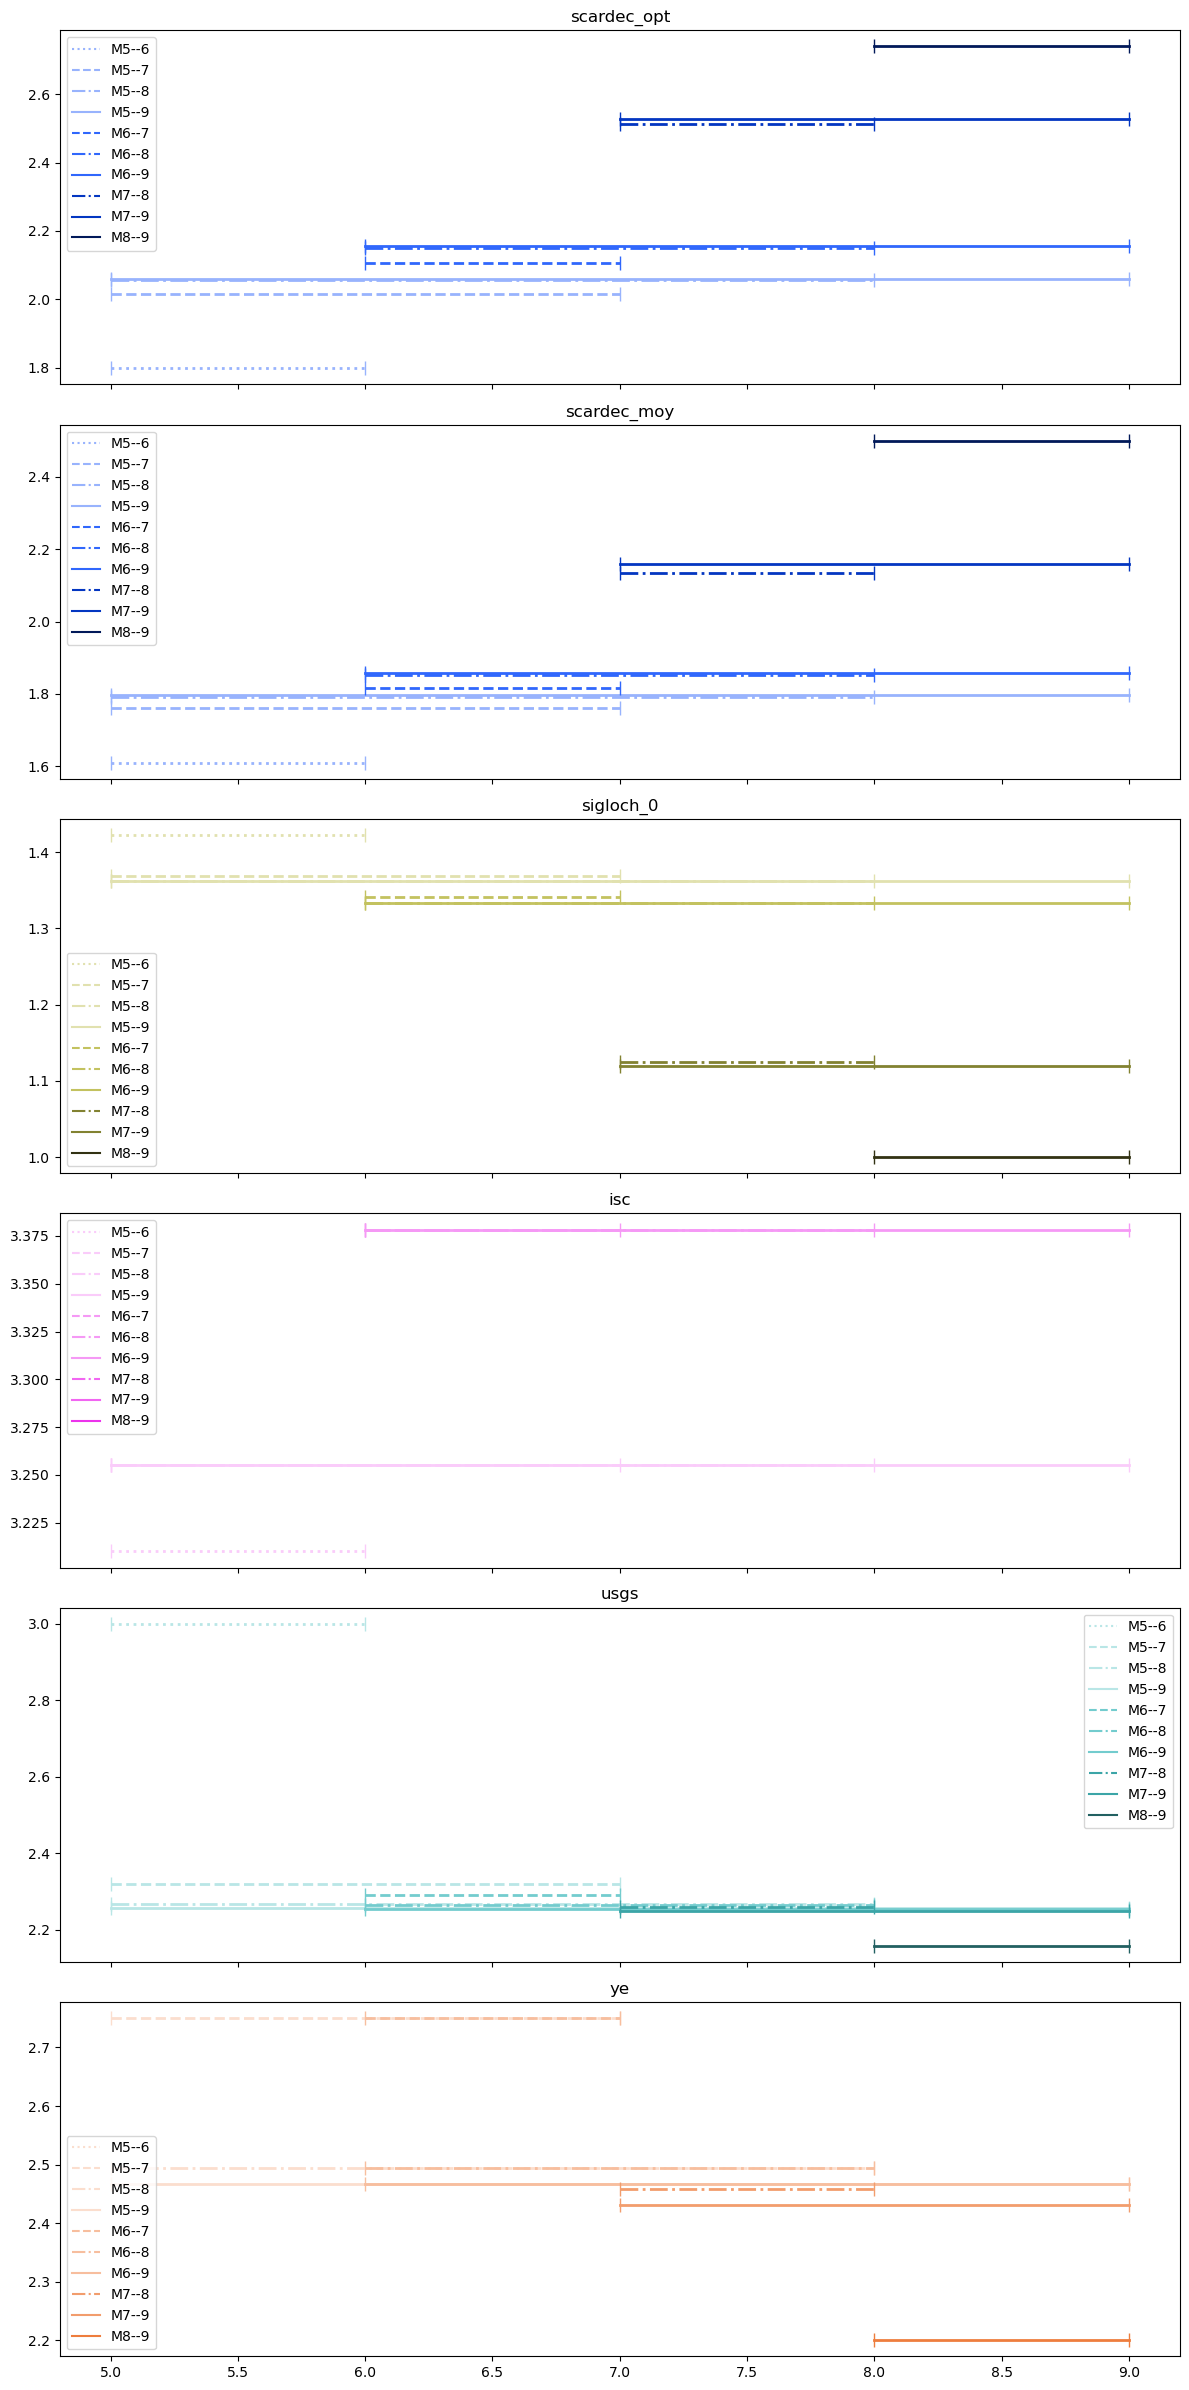

In [ ]:
count = 0
marker_list = ['o', 's', 'D', 'v', '^', '<', '>', 'p', 'P', 'X', '.']
line_styles = {'5': ':', '6': ':', '7': '--', '8': '-.', '9': '-'}
fig, axs = plt.subplots(len(df_mean), 1, figsize=(12, len(df_mean) * 4), sharex=True)

for ax, (i, row) in zip(axs, df_mean.iterrows()):
	marker_index = 0
	bin_count = 0
	#ax.plot([], [], label=i, color=dataset_colors[i.split('_')[0]], marker='|')
	for column in df_mean.columns:
		lighten = (int(column.split('_')[0])-4)/5
		if row.name.startswith('scardec') or row.name.startswith('usgs'):
			lighten = (int(column.split('_')[0])-4)/4
		elif row.name.startswith('sigloch') or row.name.startswith('ye'):
			lighten = (int(column.split('_')[0])-4)/3
		elif row.name.startswith('isc'):
			lighten = (int(column.split('_')[0])-4)
		else:
			lighten = (int(column.split('_')[0])-4)/4
		ax.plot([int(column.split('_')[0]), int(column.split('_')[1])], 
				[row[column], row[column]], 
				color=lighten_color(dataset_colors[i.split('_')[0]], lighten),
				marker="|", alpha=1, linewidth=2, markersize=10, linestyle=line_styles[column.split('_')[1]],
				zorder = int(lighten*10))
		ax.plot([],[], label = f"M{column.split('_')[0]}--{column.split('_')[1]}", color = lighten_color(dataset_colors[i.split('_')[0]], lighten), linestyle=line_styles[column.split('_')[1]])
		marker_index += 1
		bin_count += 0.01
	ax.legend()
	ax.set_title(i)
	#ax.set_ylim(0, 4)

plt.tight_layout()
#plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/large_scale_peaks_all/results_95_threshold/mean_peaks_by_magnitude_range_only_zoom.png')
plt.show()

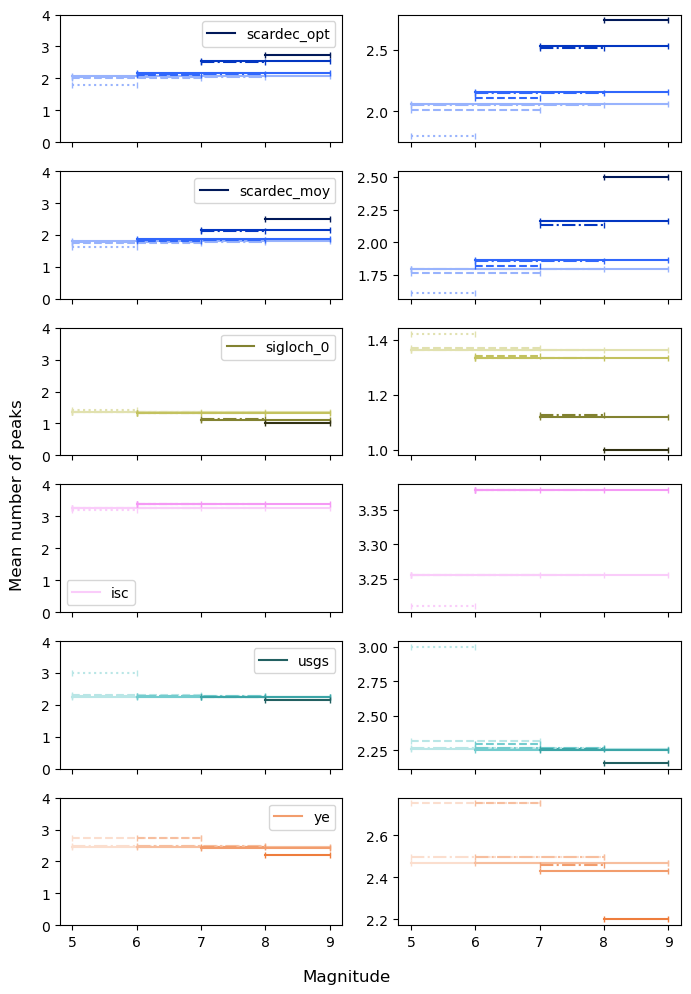

In [ ]:
count = 0
marker_list = ['o', 's', 'D', 'v', '^', '<', '>', 'p', 'P', 'X', '.']
line_styles = {'5': ':', '6': ':', '7': '--', '8': '-.', '9': '-'}
fig, axs = plt.subplots(len(df_mean), 2, figsize=(7, 10), sharex=True)

for ax, (i, row) in zip(axs, df_mean.iterrows()):
	marker_index = 0
	bin_count = 0
	for column in df_mean.columns:
		lighten = (int(column.split('_')[0])-4)/5
		if row.name.startswith('scardec') or row.name.startswith('usgs'):
			lighten = (int(column.split('_')[0])-4)/4
		elif row.name.startswith('sigloch') or row.name.startswith('ye'):
			lighten = (int(column.split('_')[0])-4)/3
		elif row.name.startswith('isc'):
			lighten = (int(column.split('_')[0])-4)
		else:
			lighten = (int(column.split('_')[0])-4)/4
		ax[0].plot([int(column.split('_')[0]), int(column.split('_')[1])], 
				   [row[column], row[column]], 
				   color=lighten_color(dataset_colors[i.split('_')[0]], lighten),
				   marker="|",  markersize=5, linestyle=line_styles[column.split('_')[1]],
				   zorder=int(lighten*10))
		#ax[0].plot([], [], label=f"M{column.split('_')[0]}--{column.split('_')[1]}", color=lighten_color(dataset_colors[i.split('_')[0]], lighten), linestyle=line_styles[column.split('_')[1]])
		ax[1].plot([int(column.split('_')[0]), int(column.split('_')[1])], 
				   [row[column], row[column]], 
				   color=lighten_color(dataset_colors[i.split('_')[0]], lighten),
				   marker="|",  markersize=5, linestyle=line_styles[column.split('_')[1]],
				   zorder=int(lighten*10))
		#ax[1].plot([], [], label=f"M{column.split('_')[0]}--{column.split('_')[1]}", color=lighten_color(dataset_colors[i.split('_')[0]], lighten), linestyle=line_styles[column.split('_')[1]])
		
		marker_index += 1
		bin_count += 0.01
	ax[0].plot([], [], label=i, color=dataset_colors[i.split('_')[0]])
	ax[0].set_ylim(0, 4)
	ax[0].legend()

fig.supylabel('Mean number of peaks')
fig.supxlabel('Magnitude')

plt.tight_layout()
#plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/large_scale_peaks_all/results_95_threshold/mean_number_of_peaks_by_magnitude_range.png', bbox_inches='tight')
plt.show()


0
0
1
1
2
2
3
3
4
4
5
5


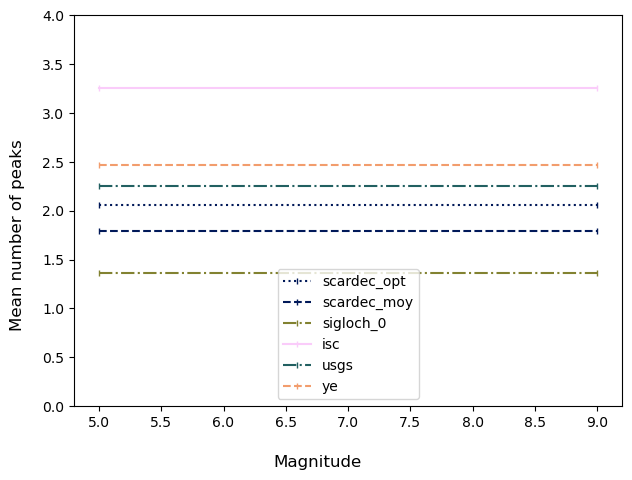

In [ ]:
count = 0
marker_list = ['o', 's', 'D', 'v', '^', '<', '>', 'p', 'P', 'X', '.']
line_styles = [':', '--', '-.', '-', '-.', '--', '-.', ':', '-', '--', '-.', ':']
fig, ax = plt.subplots(1, 1)

marker_index = 0
for i, row in df_mean.iterrows():
	#print(i)
	
	bin_count = 0
	column = '5_9'
	print(marker_index)
	ax.plot([int(column.split('_')[0]), int(column.split('_')[1])], 
				[row[column], row[column]], 
				color=dataset_colors[i.split('_')[0]],
				marker="|",  markersize=5, linestyle=line_styles[marker_index], label=i)
	print(marker_index)

	marker_index += 1
	bin_count += 0.01
	#ax.plot([], [], label=i, color=dataset_colors[i.split('_')[0]])
ax.set_ylim(0, 4)
ax.legend()

fig.supylabel('Mean number of peaks')
fig.supxlabel('Magnitude')

plt.tight_layout()
#plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/large_scale_peaks_all/results_95_threshold/mean_number_of_peaks_by_all_mags_by_dataset.png', bbox_inches='tight')
plt.show()


In [ ]:
row

5_6    1.798464
5_7    2.015445
5_8    2.055742
5_9    2.059774
6_7    2.105200
6_8    2.150371
6_9    2.155112
7_8    2.512739
7_9    2.528190
8_9    2.739130
Name: scardec_opt, dtype: float64

In [ ]:
df = df_combined.copy()
df = df[(df['scardec_opt_r2'] >= 0.95) | df['scardec_opt_r2'].isna()]
df = df[(df['scardec_moy_r2'] >= 0.95) | df['scardec_moy_r2'].isna()]
df = df[(df['ye_r2'] >= 0.95) | df['ye_r2'].isna()]
df = df[(df['usgs_r2'] >= 0.95) | df['usgs_r2'].isna()]
df = df[(df['isc_r2'] >= 0.95) | df['isc_r2'].isna()]
df = df[(df['sigloch_0_r2'] >= 0.95) | df['sigloch_0_r2'].isna()]

In [ ]:
df

,event,scardec_opt_peaks,scardec_moy_peaks,ye_peaks,usgs_peaks,sigloch_peaks,isc_peaks
0,20170818_0259,3.0,2.0,NaN,NaN,NaN,NaN
1,20110126_1542,1.0,1.0,NaN,NaN,NaN,NaN
2,19981010_1629,1.0,1.0,NaN,NaN,NaN,NaN
3,19920730_0824,2.0,1.0,NaN,NaN,NaN,NaN
4,19960327_2052,5.0,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4154,20240122_1809,NaN,NaN,NaN,1.0,NaN,NaN
4155,20240402_2358,NaN,NaN,NaN,2.0,NaN,NaN
4156,20240628_0536,NaN,NaN,NaN,1.0,NaN,NaN
4157,20240817_1910,NaN,NaN,NaN,1.0,NaN,NaN


In [30]:
datasets = ['scardec_opt', 'scardec_moy', 'ye', 'usgs', 'isc', 'sigloch_0']
labels = ['Optimal \n SCARDEC', 'Average \n SCARDEC', 'Ye', 'USGS', 'ISC', 'Sigloch']

In [31]:
import scipy.stats as stats

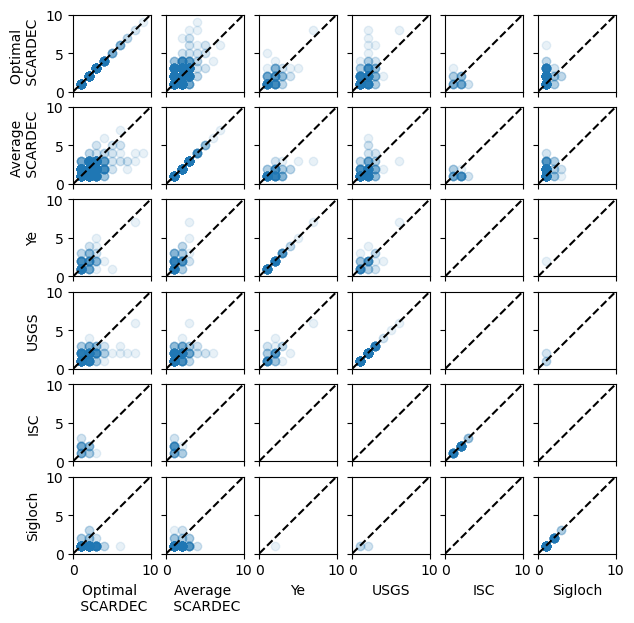

In [33]:
fig, axs = plt.subplots(len(datasets), len(datasets), figsize=(7, 7), sharex=True, sharey=True)
for i in range(0, len(datasets)):
	for j in range(0, len(datasets)):
		axs[i][j].scatter(df[datasets[j]+'_peaks'], df[datasets[i]+'_peaks'], alpha = 0.1)
		axs[i][j].set_xlim(0, 10)
		axs[i][j].set_ylim(0, 10)
		# axs[i][j].set_xlabel(datasets[j])
		# axs[i][j].set_ylabel(datasets[i])
		if i == 5:
			axs[i][j].set_xlabel(labels[j])#, fontsize=20)
		if j == 0:
			axs[i][j].set_ylabel(labels[i])#, fontsize=20)
		#print(stats.spearmanr(df[datasets[j]+'_peaks'], df[datasets[i]+'_peaks'])[0])
		axs[i][j].plot([0, 10], [0, 10], color='black', linestyle='--')
#plt.tight_layout()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/large_scale_peaks_all/results_95_threshold/peaks_different_datasets_new.png', bbox_inches='tight')

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc6/lib/python3.12/site-packages/numpy/lib/histograms.py:1067: RuntimeWarning: invalid value encountered in divide
  hist /= s


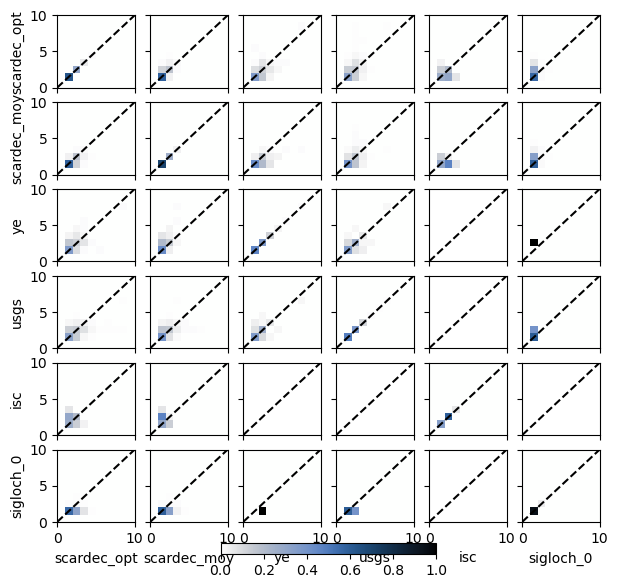

In [28]:
fig, axs = plt.subplots(len(datasets), len(datasets), figsize=(7, 7), sharex=True, sharey=True)
for i in range(len(datasets)):
	for j in range(len(datasets)):
		hist, xedges, yedges = np.histogram2d(df[datasets[j]+'_peaks'], df[datasets[i]+'_peaks'], bins=10, range=[[0, 10], [0, 10]], density=True)
		extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
		im = axs[i][j].imshow(hist.T, extent=extent, origin='lower', aspect='auto', cmap=cmc.oslo_r, vmin=0, vmax=1)
		axs[i][j].set_xlim(0, 10)
		axs[i][j].set_ylim(0, 10)
		if i == len(datasets) - 1:
			axs[i][j].set_xlabel(datasets[j])
		if j == 0:
			axs[i][j].set_ylabel(datasets[i])

		axs[i][j].plot([0, 10], [0, 10], 'k--')
fig.colorbar(im, ax=axs, orientation='horizontal', fraction=0.02, pad=0.04)
#plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/large_scale_peaks_all/results_95_threshold/peaks_different_datasets_heatmap.png', bbox_inches='tight')
#plt.tight_layout()

In [ ]:
df_mean

NameError: name 'df_mean' is not defined

In [ ]:
count = 0
marker_list = ['o', 's', 'D', 'v', '^', '<', '>', 'p', 'P', 'X', '.']
line_styles = {'5': ':', '6': ':', '7': '--', '8': '-.', '9': '-'}
fig, axs = plt.subplots(len(df_mean), 2, figsize=(7, 10), sharex=True)

for ax, (i, row) in zip(axs, df_mean.iterrows()):
	marker_index = 0
	bin_count = 0
	for column in df_mean.columns:
		lighten = (int(column.split('_')[0])-4)/5
		if row.name.startswith('scardec') or row.name.startswith('usgs'):
			lighten = (int(column.split('_')[0])-4)/4
		elif row.name.startswith('sigloch') or row.name.startswith('ye'):
			lighten = (int(column.split('_')[0])-4)/3
		elif row.name.startswith('isc'):
			lighten = (int(column.split('_')[0])-4)
		else:
			lighten = (int(column.split('_')[0])-4)/4
		ax[0].plot([int(column.split('_')[0]), int(column.split('_')[1])], 
				   [row[column], row[column]], 
				   color=lighten_color(dataset_colors[i.split('_')[0]], lighten),
				   marker="|",  markersize=5, linestyle=line_styles[column.split('_')[1]],
				   zorder=int(lighten*10))
		#ax[0].plot([], [], label=f"M{column.split('_')[0]}--{column.split('_')[1]}", color=lighten_color(dataset_colors[i.split('_')[0]], lighten), linestyle=line_styles[column.split('_')[1]])
		ax[1].plot([int(column.split('_')[0]), int(column.split('_')[1])], 
				   [row[column], row[column]], 
				   color=lighten_color(dataset_colors[i.split('_')[0]], lighten),
				   marker="|",  markersize=5, linestyle=line_styles[column.split('_')[1]],
				   zorder=int(lighten*10))
		#ax[1].plot([], [], label=f"M{column.split('_')[0]}--{column.split('_')[1]}", color=lighten_color(dataset_colors[i.split('_')[0]], lighten), linestyle=line_styles[column.split('_')[1]])
		
		marker_index += 1
		bin_count += 0.01


In [ ]:
df_mean

NameError: name 'df_mean' is not defined